# CIFAR-10

## Requirements

In [18]:
import numpy as np
import pandas as pd
import keras
import matplotlib.pyplot as plt
from keras.models import Model
from keras.layers import Input, Dense, Flatten, Conv2D, MaxPooling2D, Dropout, BatchNormalization, SpatialDropout2D
from keras.utils import plot_model
from keras.datasets import cifar10
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

In [19]:
labels = [
    "airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse",
    "ship", "truck"
]

In [20]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

### Preview

etykieta  frog


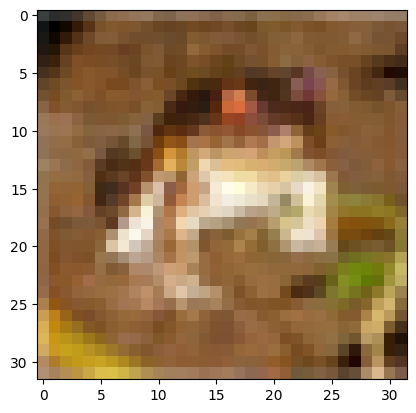

In [21]:
print("Label: ", labels[y_train[0][0]])
plt.imshow(x_train[0], cmap='gray')

## Normalization of data

In [22]:
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

## Labels to categorial


In [23]:
num_classes = len(labels)
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

## Model definition

In [24]:
input_shape = (32, 32, 3)
inputs = Input(shape=input_shape)
x = Conv2D(256,
           kernel_size=(2, 2),
           activation='relu',
           kernel_initializer='he_normal',
           padding='same')(inputs)
x = MaxPooling2D(pool_size=(2, 2))(x)
x = BatchNormalization()(x)
x = Conv2D(256,
           kernel_size=(2, 2),
           activation='relu',
           kernel_initializer='he_normal',
           padding='same')(x)
x = MaxPooling2D(pool_size=(2, 2))(x)
x = BatchNormalization()(x)
x = SpatialDropout2D(0.5)(x)
x = Flatten()(x)
x = Dense(x.shape[1] // num_classes,
          activation='relu',
          kernel_initializer='he_normal')(x)
x = Dropout(0.25)(x)
x = Dense(x.shape[1] // num_classes,
          activation='relu',
          kernel_initializer='he_normal')(x)
x = Dropout(0.25)(x)
outputs = Dense(num_classes,
                activation='softmax',
                kernel_initializer='he_normal')(x)
model = Model(inputs=inputs, outputs=outputs)

In [25]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])


## Training

In [26]:
early_stopping = keras.callbacks.EarlyStopping(patience=10,
                                               restore_best_weights=True)

history = model.fit(x_train,
                    y_train,
                    batch_size=1000,
                    epochs=500,
                    verbose='auto',
                    validation_data=(x_test, y_test),
                    callbacks=[early_stopping])

Epoch 1/500
50/50 ━━━━━━━━━━━━━━━━━━━━ 21s 380ms/step - accuracy: 0.2531 - loss: 3.2617 - val_accuracy: 0.1466 - val_loss: 2.2533
Epoch 2/500
50/50 ━━━━━━━━━━━━━━━━━━━━ 19s 372ms/step - accuracy: 0.4531 - loss: 1.5383 - val_accuracy: 0.2522 - val_loss: 2.1439
Epoch 3/500
50/50 ━━━━━━━━━━━━━━━━━━━━ 19s 371ms/step - accuracy: 0.5394 - loss: 1.3013 - val_accuracy: 0.2723 - val_loss: 2.2486
Epoch 4/500
50/50 ━━━━━━━━━━━━━━━━━━━━ 19s 373ms/step - accuracy: 0.5981 - loss: 1.1324 - val_accuracy: 0.2501 - val_loss: 2.7672
Epoch 5/500
50/50 ━━━━━━━━━━━━━━━━━━━━ 18s 370ms/step - accuracy: 0.6437 - loss: 1.0127 - val_accuracy: 0.2636 - val_loss: 2.7988
Epoch 6/500
50/50 ━━━━━━━━━━━━━━━━━━━━ 19s 371ms/step - accuracy: 0.6778 - loss: 0.9097 - val_accuracy: 0.2973 - val_loss: 2.6816
Epoch 7/500
50/50 ━━━━━━━━━━━━━━━━━━━━ 19s 374ms/step - accuracy: 0.7157 - loss: 0.8027 - val_accuracy: 0.4257 - val_loss: 1.8331
Epoch 8/500
50/50 ━━━━━━━━━━━━━━━━━━━━ 19s 373ms/step - accuracy: 0.7437 - loss: 0.7254 - 

## History graph

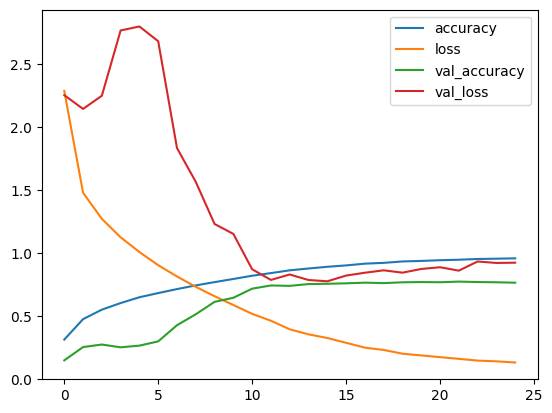

In [27]:
df = pd.DataFrame(history.history)
ax = df.plot()

## Model evaluation


In [29]:
loss, accuracy = model.evaluate(x_test, y_test, verbose='auto')
print('Test loss:', loss)
print('Test accuracy:', accuracy)

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.7611 - loss: 0.7585
Test loss: 0.7746267318725586
Test accuracy: 0.7548999786376953


## Model visualization

Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 32, 32, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 32, 32, 256)    │         3,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 16, 16, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 16, 16, 256)    │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 16, 16, 256)    │       262,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 8, 8, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 8, 8, 256)      │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ spatial_dropout2d_1             │ (None, 8, 8, 256)      │             0 │
│ (SpatialDropout2D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 16384)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1638)           │    26,838,630 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 1638)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 163)            │       267,157 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 163)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │         1,640 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 82,123,563 (313.28 MB)

 Trainable params: 27,374,179 (104.42 MB)

 Non-trainable params: 1,024 (4.00 KB)

 Optimizer params: 54,748,360 (208.85 MB)

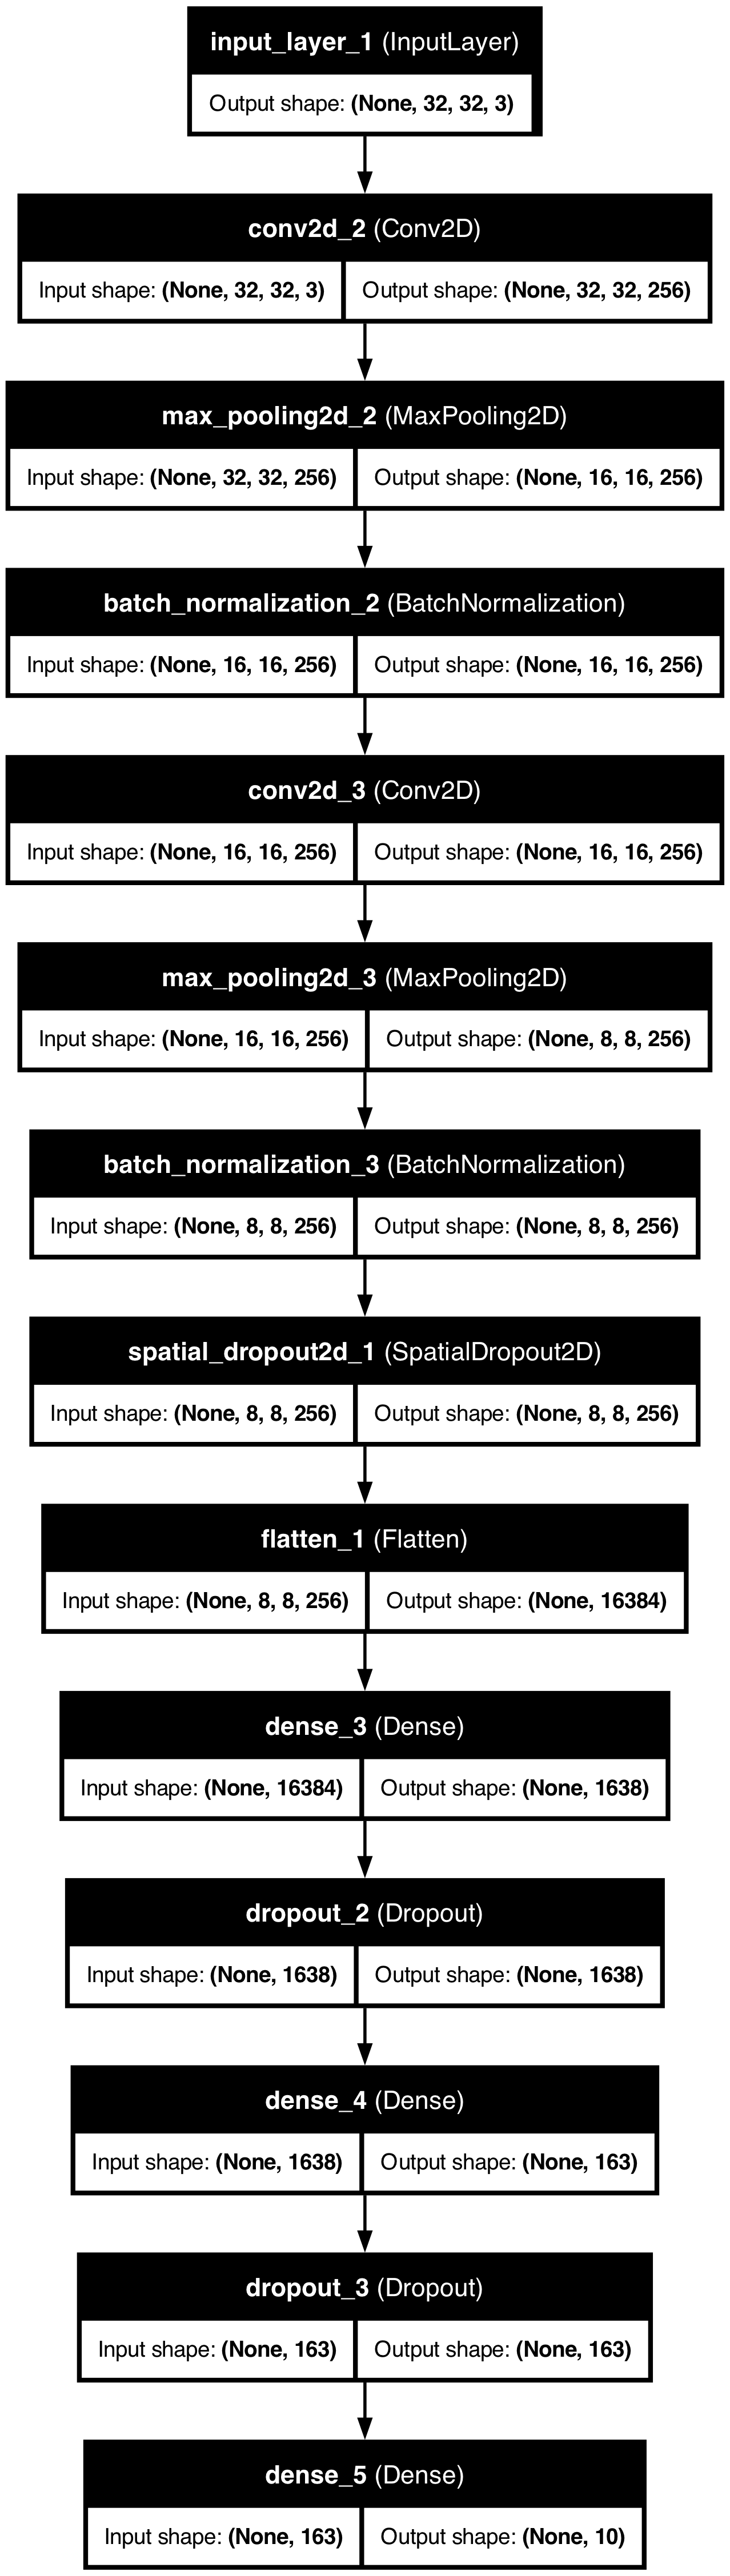

In [30]:
model.summary()
plot_model(model,
           to_file='model_plot.png',
           show_shapes=True,
           show_layer_names=True)

## Wyświetlanie przykładów źle sklasyfikowanych

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
Przykład źle sklasyfikowany nr 1


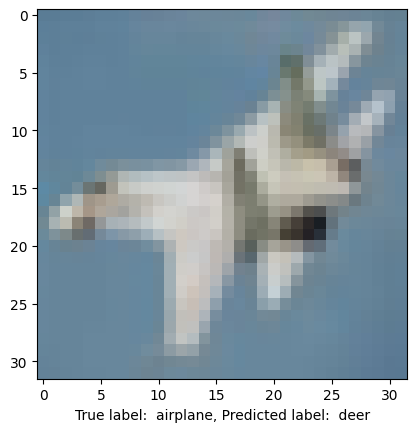

Przykład źle sklasyfikowany nr 2


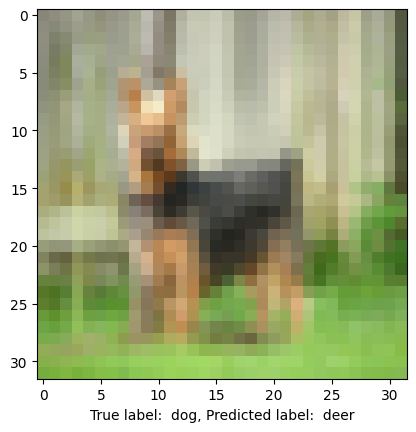

Przykład źle sklasyfikowany nr 3


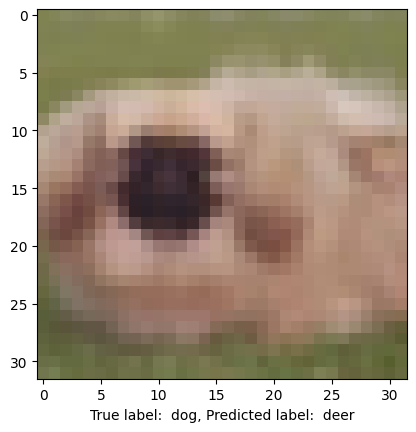

Przykład źle sklasyfikowany nr 4


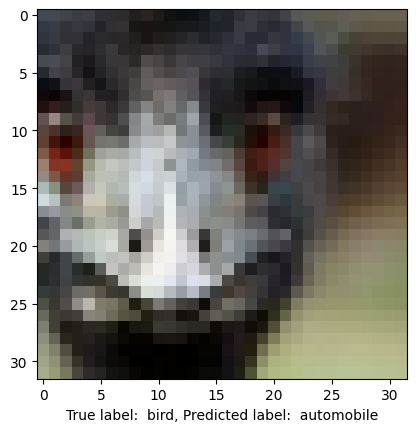

Przykład źle sklasyfikowany nr 5


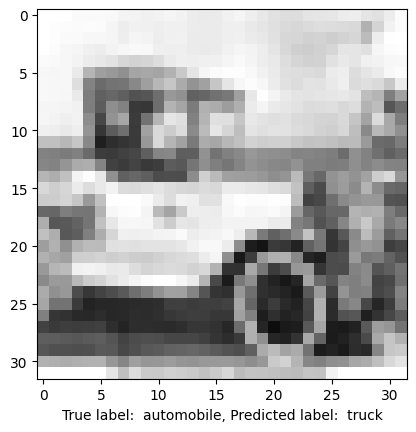

In [32]:
predictions = np.argmax(model.predict(x_test), axis=1)
y_test_flat = np.argmax(y_test, axis=1)
incorrect_indices = np.nonzero(predictions != y_test_flat)[0]

for i in range(5):
    idx = incorrect_indices[i]
    print("Incorrent classification no", i + 1)
    plt.imshow(x_test[idx].reshape(32, 32, 3))
    plt.xlabel(
        f"True label:  {labels[y_test_flat[idx]]}, Predicted label:  {labels[predictions[idx]]}"
    )
    plt.show()

## Confusion matrix


In [33]:
cm = confusion_matrix(y_test_flat, predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)


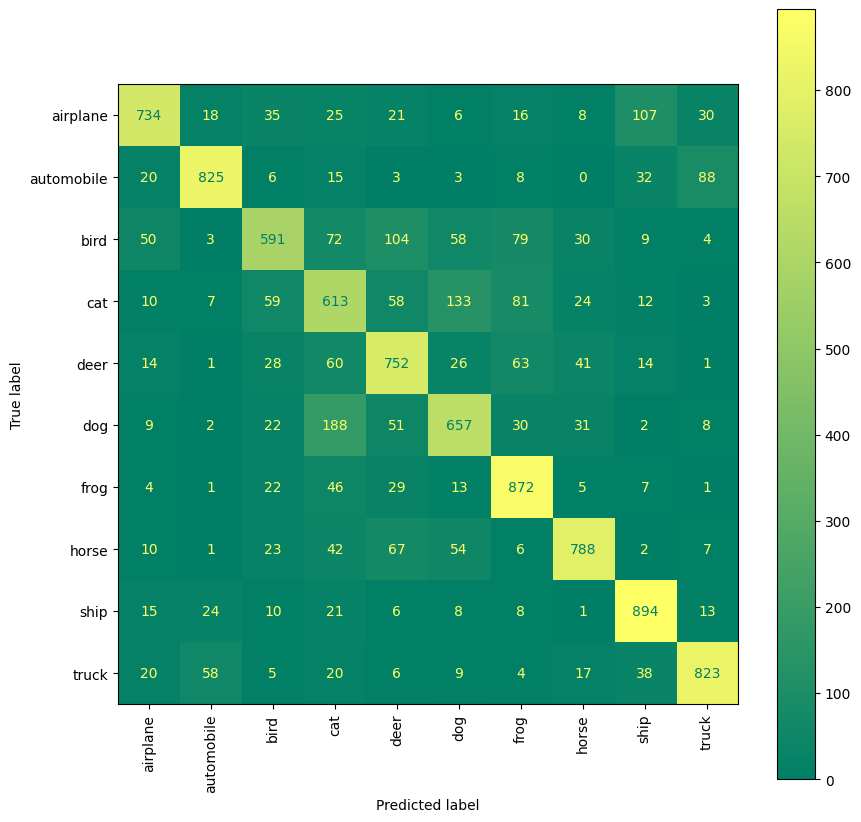

In [34]:
fig, ax = plt.subplots(figsize=(10, 10))
disp = disp.plot(xticks_rotation='vertical', ax=ax, cmap='summer')
plt.savefig('confusion_matrix.png')
plt.show()